In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [13]:
# LOADING DATA - Fashion MNIST
# DataSet class for PyTorch and tf.data for TensorFlow.

# Pytorch

In [14]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [15]:
# create the transformer for put the data to the tensor
transforms = transforms.Compose([
    transforms.ToTensor()
])

# load the train data - if not exists download it
train_dataset_py = torchvision.datasets.FashionMNIST(root='/content/drive/My Drive/article/data/',
                                             train=True, 
                                             transform=transforms,
                                             download=True)

test_dataset_py = torchvision.datasets.FashionMNIST(root='/content/drive/My Drive/article/data/',
                                             train=False, 
                                             transform=transforms,
                                             download=True)


In [16]:
def imshowPytorch(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

tensor(9)


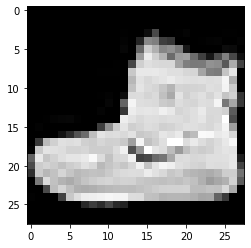

In [17]:
# create a data loader - I will use it for the training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset_py,
                                           batch_size=32, 
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset_py,
                                           batch_size=32, 
                                           shuffle=False)
                                           
data_iter = iter(train_loader)
images, label = data_iter.next()
imshowPytorch(torchvision.utils.make_grid(images[0]))
print(label[0])

In [18]:
# For PyTorch, we also have two modes of the model: train and production. 
# To put the model in the production mode, we just have to use method .eval() 
# Once the model is in the production mode, some methods will be turned off automatically, such as dropout.
# To move it to the training mode, we have to use method .train() as train is the default mode.

class NeuralNet(nn.Module):
    def __init__(self, num_of_class):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7 * 7 * 32, num_of_class)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [19]:
modelpy = NeuralNet(10)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(modelpy.parameters())

modelpy

NeuralNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [20]:
%%time
for e in range(10):
    # define the loss value after the epoch
    losss = 0.0
    number_of_sub_epoch = 0
    
    # loop for every training batch (one epoch)
    for images, labels in train_loader:
        #create the output from the network
        out = modelpy(images)
        # count the loss function
        loss = criterion(out, labels)
        # in pytorch you have assign the zero for gradient in any sub epoch
        optim.zero_grad()
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        # add new value to the main loss
        losss += loss.item()
        number_of_sub_epoch += 1
    print("step {}: loss: {}".format(e, losss / number_of_sub_epoch))

step 0: loss: 0.3918272654871146
step 1: loss: 0.27888995291193325
step 2: loss: 0.24272490561505158
step 3: loss: 0.21789499317804972
step 4: loss: 0.19831469341715177
step 5: loss: 0.18189357936282952
step 6: loss: 0.16647196079740922
step 7: loss: 0.1541275581859052
step 8: loss: 0.14233158792952696
step 9: loss: 0.13096408621097605
CPU times: user 8min 57s, sys: 6.28 s, total: 9min 3s
Wall time: 9min 3s


In [ ]:
correct = 0
total = 0
modelpy.eval()
for images, labels in test_loader:
    outputs = modelpy(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the {} test images: {}%'.format(total, 100 * correct / total))

In [ ]:
# save the models.
torch.save(modelpy, "/content/drive/My Drive/article/model.pt")

In [ ]:
# load the model:
model_load_py = torch.load("/content/drive/My Drive/article/model.pt")
model_load_py

In [ ]:
# check if the model was saved with the weight 
correct = 0
total = 0
for images, labels in test_loader:
    outputs = model_load_py(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the {} test images: {}%'.format(total, 100 * correct / total))

# Tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras

In [7]:
# Load the data set
fashion_mnist = keras.datasets.fashion_mnist

#split to test and train
(train_images_tf, train_labels_tf), (test_images_tf, test_labels_tf) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
train_images_tf = train_images_tf / 255.0
test_images_tf = test_images_tf / 255.0

In [10]:
def imshowTensorFlow(img):
  plt.imshow(img)

In [ ]:
imshowTensorFlow(train_images_tf[0])

print(train_labels_tf[0])

In [ ]:
modeltf = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1), filters=16, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.BatchNormalization(), 
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(32, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.BatchNormalization(), 
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
modeltf.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modeltf.summary()

In [ ]:
# Because Fashion MNIST in TensorFlow is an array with only two dimensions, 
# we have to add the number of channels (in our case it’s just one):

train_images_tf = train_images_tf.reshape(train_images_tf.shape[0], 
                                          train_images_tf.shape[1],
                                          train_images_tf.shape[2], 1)
 %%time
modeltf.fit(train_images_tf, train_labels_tf, epochs=10, batch_size=32)

In [ ]:
test_images_tf = test_images_tf.reshape(test_images_tf.shape[0],
                                        test_images_tf.shape[1],
                                        test_images_tf.shape[2], 1)
predictions = modeltf.predict(test_images_tf)
correct = 0
for i, pred in enumerate(predictions):
  if np.argmax(pred) == test_labels_tf[i]:
    correct += 1
print('Test Accuracy of the model on the {} test images: {}%'.format(test_images_tf.shape[0],
                                                                     100 * correct/test_images_tf.shape[0]))


In [ ]:
# another way of inference
test_loss, test_acc = modeltf.evaluate(test_images_tf, test_labels_tf)
print('Test accuracy:', test_acc)

In [ ]:
# save the model 
modeltf.save('modeltf.h5')

In [ ]:
# load the model
model_load_tf = tf.keras.models.load_model('modeltf.h5')
model_load_tf.summary()
test_loss, test_acc = model_load_tf.evaluate(test_images_tf, test_labels_tf)
print('Test accuracy:', test_acc)

# In summary
<hr>

**Tensorflow**
>Pros:
* Simple built-in high level API
* Tensorboard (easy to use visualisation tool)
* Simple serving method on production
* Very good documentation
* Easy mobile support

>Cons:
* Static graph
* Debugging method
* Hard to make quick changes
<hr>

**Pytorch**
>Pros:
* Python-like coding
* Dynamic graph
* Easy & quick editing
* Very good documentation available
* Plenty of projects out there which use Pytorch

>Cons:
* Third party needed for visualisation
* API knowledge needed in Python to move to production
<hr>